## TP 3
### Vision por computadora 1
#### Marcelo Chichiri

▪ Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del item 1
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.


Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
# non_max_suppression se utiliza para suprimir los 
from imutils.object_detection import non_max_suppression

#### Carga y visualización de template

In [2]:
# Lee el archivo y devuelve la imagen en formato original BGR, color RGB, escala de grices y bordes
def obtener_imagen(Archivo=''):
    # Carga imagen y conviere a RGB
    img_original = cv.imread(Archivo, cv.IMREAD_COLOR)
    img_color= cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
    
    # Convierte imagen a escala de grices 
    img_BN= cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
    
    # Obtiene bordes del template 
    img_bordes = cv.Canny(img_BN, 350, 350, apertureSize = 3)
    return img_original, img_color, img_BN, img_bordes

Template y sus imagenes derivadas


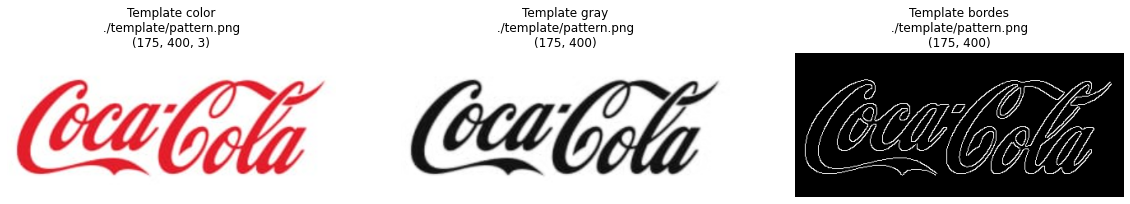

In [3]:
# Cargar imagen del template a utilizar y muestra el color RGB, escala de grices y bordes 

nombre_template = './template/pattern.png'

# Carga imagen y conviere a RGB
_, img_template_Color, img_template_BN, img_template_bordes = obtener_imagen(Archivo=nombre_template)

print('Template y sus imagenes derivadas')

# Muestra imagen original 
plt.figure(figsize=(20, 20))
plt.subplot(1,3,1)
plt.axis('off')
plt.title(f'Template color\n {nombre_template} \n{np.shape(img_template_Color)}')
plt.imshow(img_template_Color, cmap='gray')

# Muestra imagen en escala de grices 
plt.subplot(1,3,2)
plt.axis('off')
plt.title(f'Template gray\n {nombre_template} \n{np.shape(img_template_BN)}')
plt.imshow(img_template_BN, cmap='gray')

# Muestra imagen bordes 
plt.subplot(1,3,3)
plt.axis('off')
plt.title(f'Template bordes\n {nombre_template} \n{np.shape(img_template_bordes)}')
plt.imshow(img_template_bordes, cmap='gray')

### Carga y visualización de imagenes


In [4]:
#Lee la imagen por medio de obtener_imagen y muestra la imagen color RGB, escala de grices y bordes

def graficar_imagen(imagenes='', path_imagen=''):
    
    # Se grafican las imagenes con un k=5 (5x5) y un sigma de 5 y de 15
    plt.figure(figsize=(10, 10))
    for i in range(len(imagenes)):
        fila = i + 1
        imagen_path = path_imagenes + '/' + imagenes[i]
        
        _, img_Color, img_BN, img_bordes = obtener_imagen(Archivo=imagen_path)
        
        # Muestra imagen original 
        plt.figure(figsize=(20, 20))
        plt.subplot(fila,3,1)
        plt.axis('off')
        plt.title(f'Imagen color\n {imagenes[i]} \n{np.shape(img_Color)}')
        plt.imshow(img_Color, cmap='gray')

        # Muestra imagen en escala de grices 
        plt.subplot(fila,3,2)
        plt.axis('off')
        plt.title(f'Imagen gray\n {imagenes[i]} \n{np.shape(img_BN)}')
        plt.imshow(img_BN, cmap='gray')

        # Muestra imagen bordes 
        plt.subplot(fila,3,3)
        plt.axis('off')
        plt.title(f'Imagen bordes\n {imagenes[i]} \n{np.shape(img_bordes)}')
        plt.imshow(img_bordes, cmap='gray')

In [5]:
path_imagenes = './images'
imagenes =  ['coca_logo_1.png', 'coca_logo_2.png', 'coca_multi.png', 
             'coca_retro_1.png', 'coca_retro_2.png', 'COCA-COLA-LOGO.jpg',
            'logo_1.png']

Imagenes originales y sus imagenes derivadas


<Figure size 720x720 with 0 Axes>

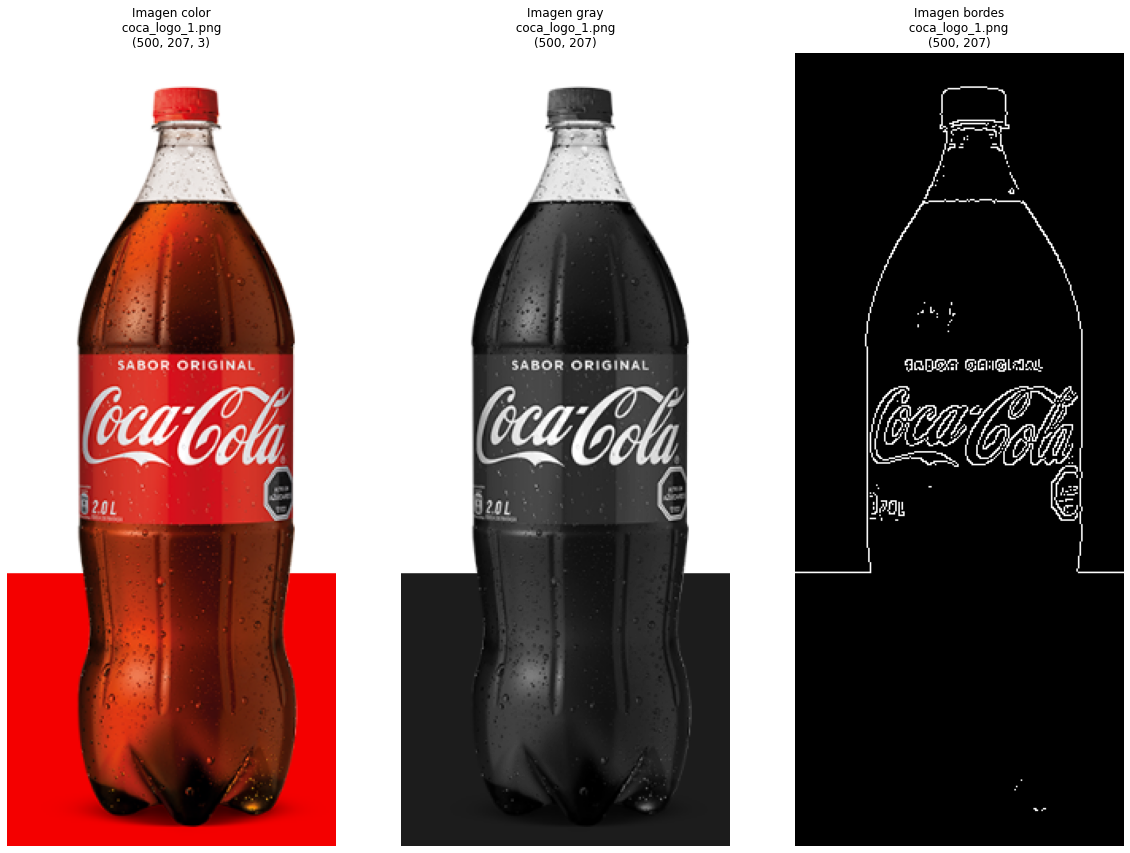

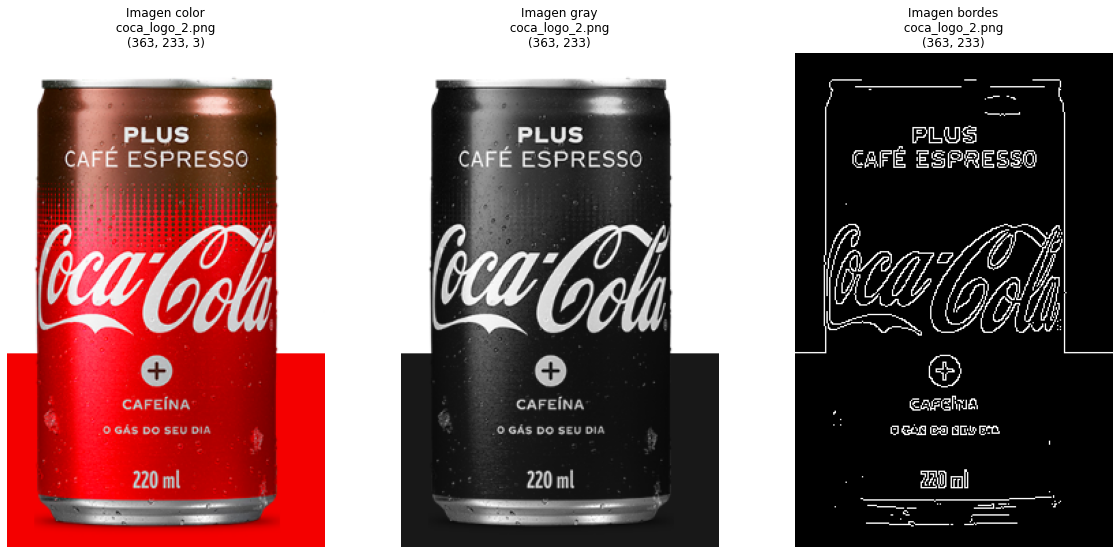

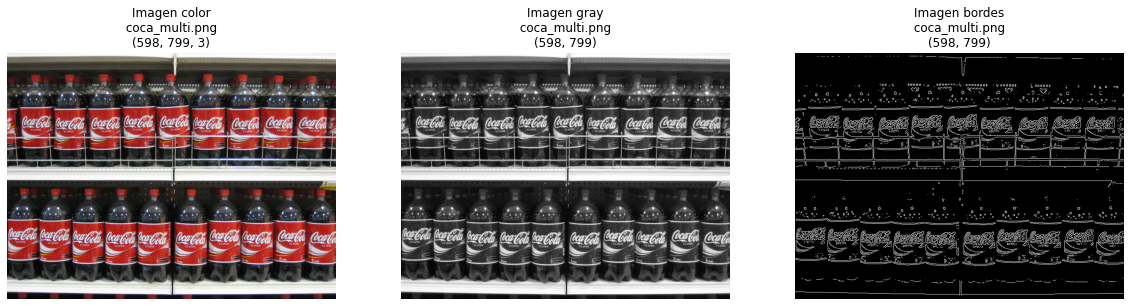

In [6]:
# grafica parte de las imagenes de prueba
print('Imagenes originales y sus imagenes derivadas')
graficar_imagen(imagenes=imagenes[0:3], path_imagen=path_imagenes)


Imagenes originales y sus imagenes derivadas


<Figure size 720x720 with 0 Axes>

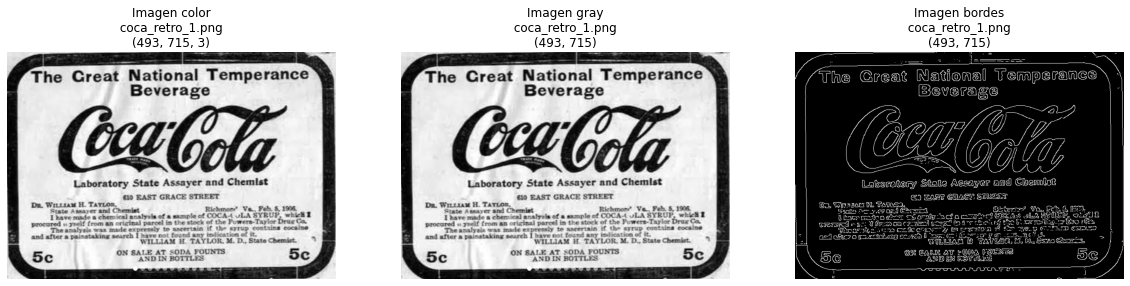

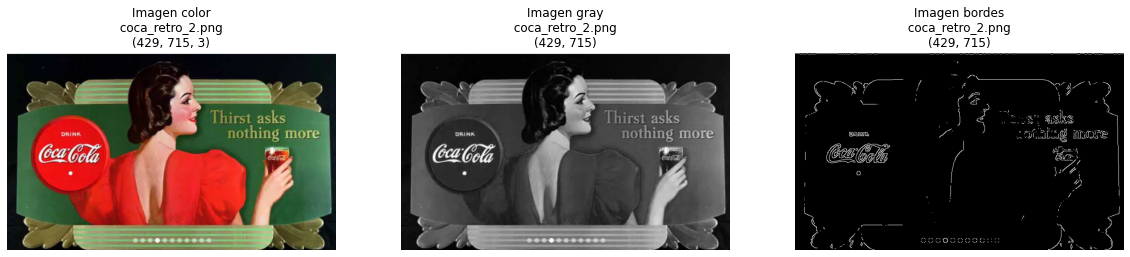

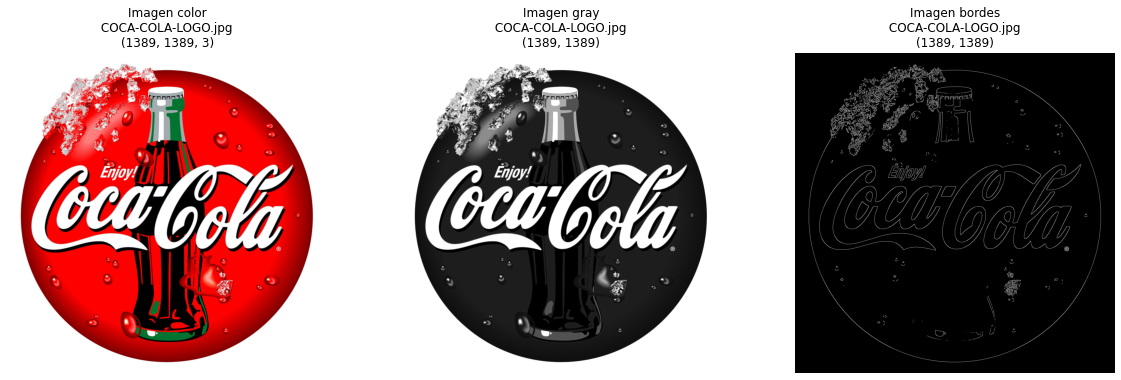

In [7]:
# grafica parte de las imagenes de prueba
print('Imagenes originales y sus imagenes derivadas')
graficar_imagen(imagenes=imagenes[3:6], path_imagen=path_imagenes)

Imagenes originales y sus imagenes derivadas


<Figure size 720x720 with 0 Axes>

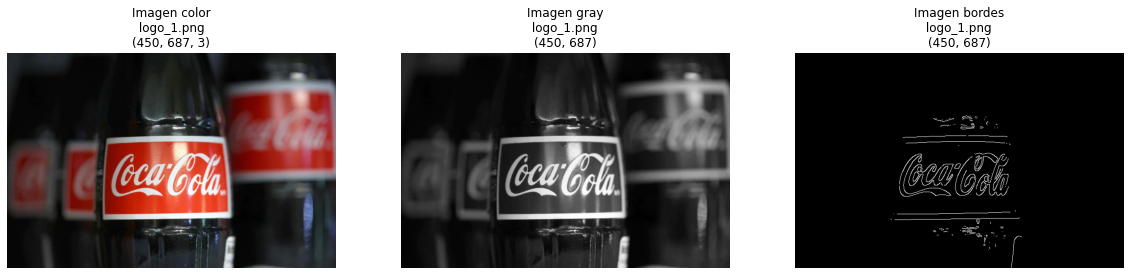

In [8]:
# grafica parte de las imagenes de prueba
print('Imagenes originales y sus imagenes derivadas')
graficar_imagen(imagenes=imagenes[6:7], path_imagen=path_imagenes)

### Carga y visualización de la imagen y el template

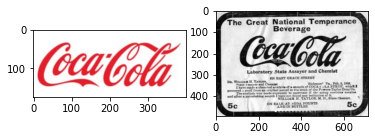

In [9]:
# Carga y muestro el template y la imagen de prueba a procesar

_, img_color, img_BN, img_bordes = obtener_imagen(Archivo='./images/coca_retro_1.png')
_, img_template_color, img_template_BN, img_template_bordes = obtener_imagen(Archivo='./template/pattern.png')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_template_color, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_color)

In [10]:
# Obtiene bordes del template y las dimensiones

(H_template, W_template) = img_template_bordes.shape
print(f'Las dimensiones del template son {H_template} x {W_template}')

# Obtiene bordes de la imagen y las dimensiones 

(H_img, W_img) = img_bordes.shape
print(f'Las dimensiones de la imagen son {W_img} x {H_img}')

Las dimensiones del template son 175 x 400
Las dimensiones de la imagen son 715 x 493


In [11]:
# Relacion entre el ancho y alto de la imagen vs el template
relacion_W = W_img / W_template
relacion_H = H_img / H_template
print(f'La relacion de ancho entre la imagen y el tempalte es {relacion_W:2.4f}')
print(f'La relacion de alto entre la imagen y el tempalte es {relacion_H:2.4f}')

La relacion de ancho entre la imagen y el tempalte es 1.7875
La relacion de alto entre la imagen y el tempalte es 2.8171


### Se generan los parametros de las piramides y se muestran los templates generados

In [12]:
# Procedimiento para generar las dimensiones de los niveles de la piramide segun los parametros dados
def gen_piramide(imagen='', relacionW=0, desde=0.2, niveles=10):
    arr_escalas = np.arange(desde, relacionW, (relacionW-desde)/niveles) # Calculo las escalas para generar la cantidad de niveles indicados
    nuevas_dim = list()
    for scale in arr_escalas:
        ancho = int(img_template_bordes.shape[1] * scale)
        alto = int(img_template_bordes.shape[0] * scale)
        dim = (ancho, alto)
        nuevas_dim.append(cv.resize(imagen, dim, interpolation = cv.INTER_AREA))
    return nuevas_dim, arr_escalas

Se generaron 40 niveles en la pirámide :


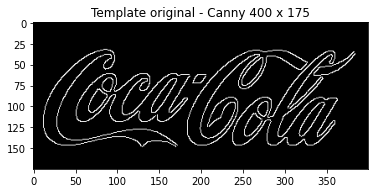

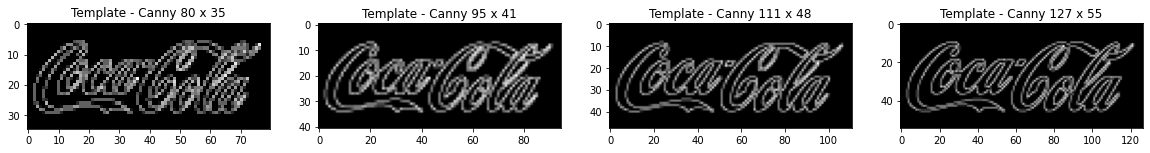

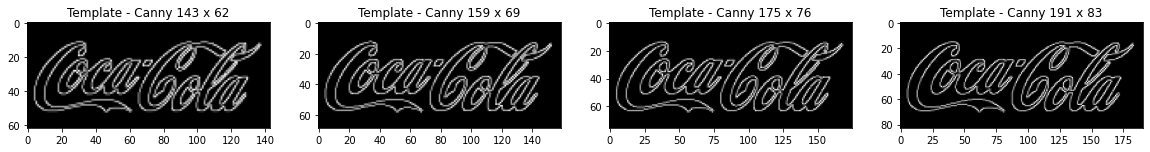

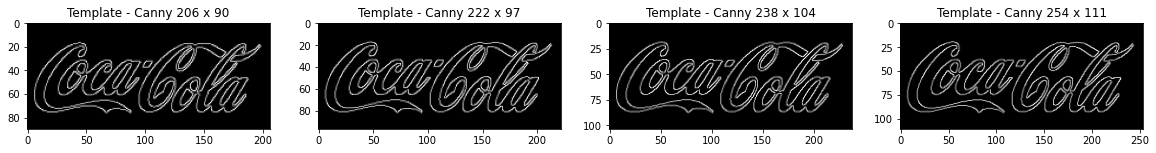

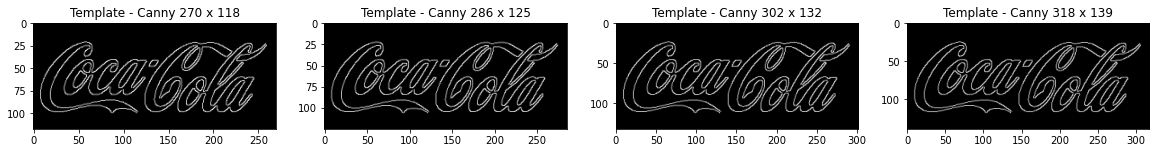

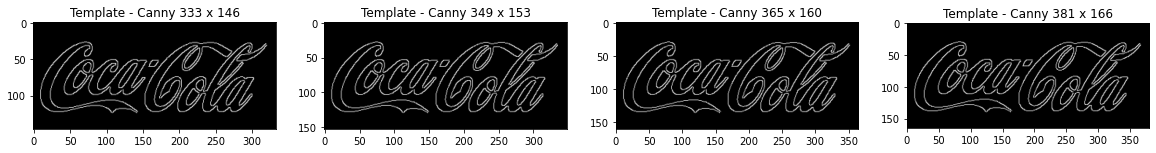

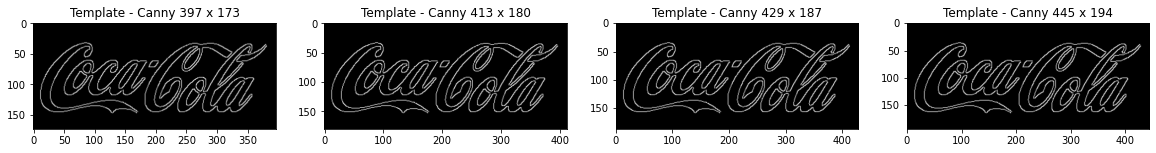

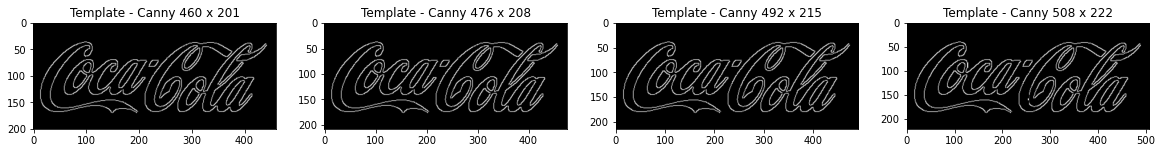

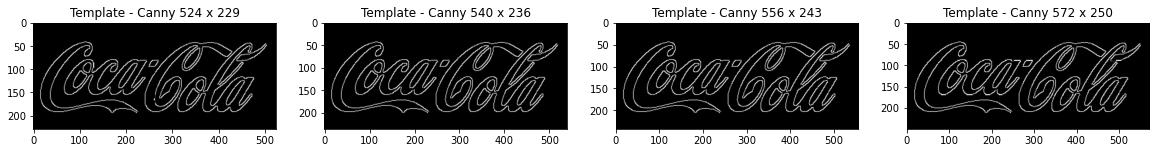

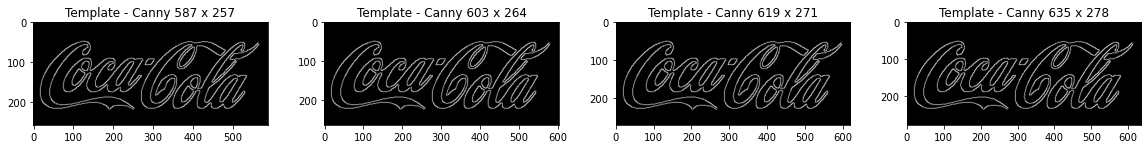

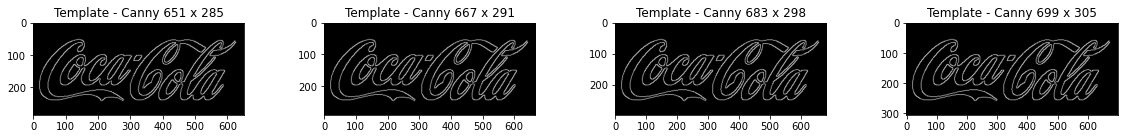

In [13]:
# Se generan los niveles de la pirámide de imágenes 

cantidad_niveles = 40
resized_templates, arr_escalas = gen_piramide(imagen=img_template_bordes, 
                                              relacionW=relacion_W, desde=0.2, niveles=cantidad_niveles)  
Tot = arr_escalas.shape[0]
print(f'Se generaron {Tot} niveles en la pirámide :')

k=0
# Muestra imagen original y los otros niveles de la piramide
plt.title(f'Template original - Canny {img_template_bordes.shape[1]} x {img_template_bordes.shape[0]}')
plt.imshow(img_template_bordes, cmap='gray')
for fila in range(1, (cantidad_niveles//4)+1):
    plt.figure(figsize=(20, 20))
    for columna in range(1, 5):
        plt.subplot(fila,4,columna)
        #plt.axis('off')
        plt.title(f'Template - Canny {resized_templates[k].shape[1]} x {resized_templates[k].shape[0]}')
        plt.imshow(resized_templates[k], cmap='gray')
        k = k + 1
        

### 1. Obtener una detección del logo en cada imagen sin falsos positivos

#### Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

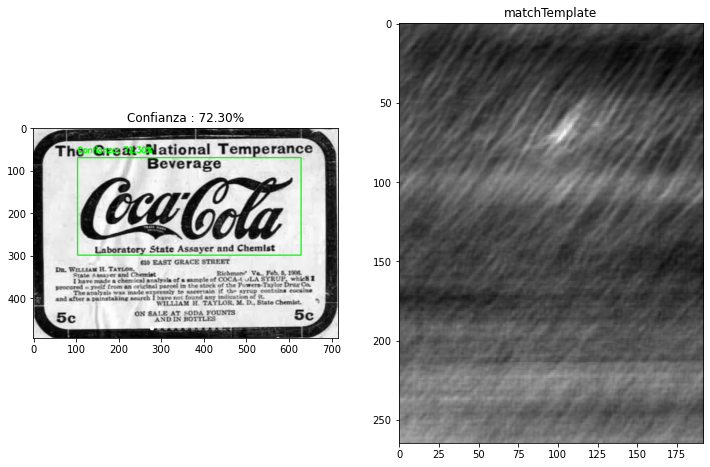

In [14]:
# Se usa la imagen de prueba, cargada anteriormente, para buscar el template que mejor ajuste

mejor_nivel_confianza = 0

metodo = cv.TM_CCOEFF

for template in resized_templates:
    
    # Tomo las dimensiones del template.
    W_template, H_template = template.shape[::-1]
    W_img, H_img = img_bordes.shape[::-1]
    
    # Se realiza la operacion de match solo si el template es menor a la imagen
    if (W_template < W_img):
        matchTemp = cv.matchTemplate(img_bordes, template, metodo)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(matchTemp)
        
        # Se usa como métrica el máximo valor obtenido en relación al rango de valores de cada match
        nivel_confianza = max_val / (max_val - min_val)
        
        # Me voy quedando con los datos del mejor match
        if (nivel_confianza > mejor_nivel_confianza):
            mejor_nivel_confianza = nivel_confianza
            mejor_top_left_x, mejor_top_left_y = max_loc
            mejor_top_left = max_loc
            img_match = matchTemp.copy()
            img_prueba = img_color.copy()
            mejor_bottom_right = (mejor_top_left_x + W_template, mejor_top_left_y + H_template)
        
cv.rectangle(img_prueba, (mejor_top_left_x, mejor_top_left_y) , mejor_bottom_right, [0,255,0], 2)
cv.putText(img_prueba, f'Confianza: {(mejor_nivel_confianza * 100):.2f}%', 
           (mejor_top_left_x, mejor_top_left_y-12), cv.FONT_HERSHEY_SIMPLEX, 0.6, [0,255,0], 2)

plt.figure(figsize=(12, 12))

plt.subplot(1,2,1)
#plt.axis('off')
plt.title(f"Confianza : {(mejor_nivel_confianza* 100):.2f}%")
plt.imshow(img_prueba)

plt.subplot(1,2,2)
#plt.axis('off')
plt.title("matchTemplate")
plt.imshow(img_match,cmap='gray')
plt.show()    

#### Resultados y conclusiones punto 1

Para resolver este punto se vio que no bastaba con obtener el matchTemplate con la imagen y el template original, por lo cual convertí la imagen a escala de grises, pero eso tampoco dio buen resultado. El mejor resultado se obtuvo obteniendo los bordes de la imagen y el template por medio de Canny. \
Por otro lado, para poder ser independiente de las dimensiones de la imagen y del template se usa el sistema de pirámides, calculando distintos tamaños de templates. \
Para el matchTemplate se usaron los métodos 'cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR','cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF' y 'cv.TM_SQDIFF_NORMED'. Los dos métodos que dieron mejores resultados, y muy similares, fueron 'cv.TM_CCOEFF' y 'cv.TM_CCOEFF_NORMED'. \
Para obtener el mejor resultado se hace el matchTemplate con cada uno de los templates de la pirámide. \
Los resultados obtenidos con la detección del logo en la imagen fueron muy buenos y no se presentaron falsos positivos.

### 2. Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del item 1

#### Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

In [15]:
# Obtiene la imagen de prueba
_, img_color, img_BN, img_bordes = obtener_imagen(Archivo='./images/coca_multi.png')

(H_img, W_img) = img_bordes.shape 
print(f'La dimension de la imagen de prueba es {W_img} x {H_img}')

La dimension de la imagen de prueba es 799 x 598


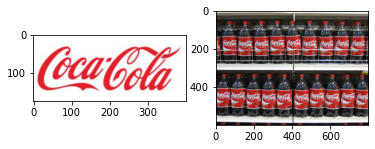

In [16]:
# muestro la imagen de prueba a procesar y el template

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_template_color, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_color)

In [17]:
# Relacion entre el ancho y alto de la imagen vs el template
relacion_W = W_img / W_template
relacion_H = H_img / H_template
print(f'La relacion de ancho entre la imagen y el tempalte es {relacion_W:.4f}')
print(f'La relacion de alto entre la imagen y el tempalte es {relacion_H:.4f}')

La relacion de ancho entre la imagen y el tempalte es 1.1431
La relacion de alto entre la imagen y el tempalte es 1.9607


In [18]:
# Se generan los niveles de la pirámide de imágenes 

cantidad_niveles = 40
resized_templates, arr_escalas = gen_piramide(imagen=img_template_bordes, 
                                              relacionW=relacion_W, desde=0.2, niveles=cantidad_niveles)  

Número de resultados ANTES de aplicar non max suppression: 47
Número de resultados DESPUÉS de aplicar non max suppression: 13


<Figure size 864x864 with 0 Axes>

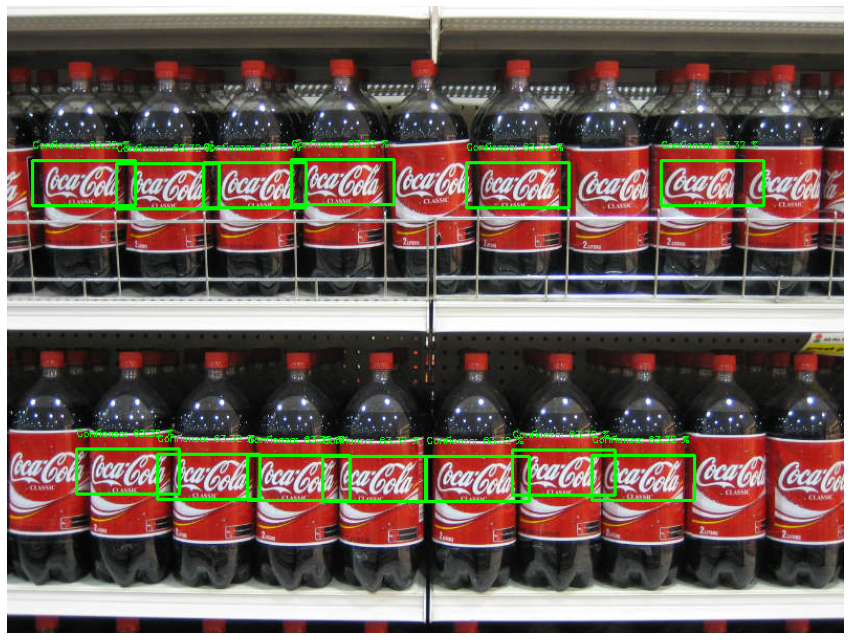

In [19]:
mejor_nivel_confianza = 0

metodo= cv.TM_CCOEFF_NORMED

# Se recorren todos los templates de la piramide para buscar el mejor
for template in resized_templates:
    
    # Dimensiones del template.
    W_template, H_template = template.shape[::-1]
    W_img, H_img = img_bordes.shape[::-1]
    
    # Realizamos la operacion de match solo si el template es menor a la imagen
    if (W_template < W_img):
        matchTemp = cv.matchTemplate(img_bordes, template, metodo)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(matchTemp)
        
        # Se usa como métrica el máximo valor obtenido en relación al rango de valores de cada match
        nivel_confianza = max_val / (max_val - min_val)
        # Me voy quedando con el mejor match
        if (nivel_confianza > mejor_nivel_confianza):
            mejor_nivel_confianza = nivel_confianza
            mejor_template = template
            img_match = matchTemp.copy()
               
# Copio la imagen a usar
imgMulti = img_color.copy()        

w, h = mejor_template.shape[::-1]
plt.figure(figsize=(12,12))

# Fijamos un umbral de "coincidencia"
umbral = 0.7

# La localizacion de los puntos de match dependen de un porcentaje del maximo valor encontrado en la imagen. 
loc = np.where(img_match >= umbral * img_match.max())

rectangulos = []

# Agrega a rectangulo todos las coincidencias que superon el umbral
for pt in zip(*loc[::-1]):
    rectangulos.append((pt[0], pt[1], pt[0] + w, pt[1] + h))
    
# Se aplica non_max_suppression para suprimir los rectangulos solapados
rectangulos_non_max_suppression = non_max_suppression(np.array(rectangulos))
    
for nms in (rectangulos_non_max_suppression):
    cv.putText(imgMulti, f"Confianza: {(mejor_nivel_confianza * 100):.2f} %", (nms[0],nms[1]-12), cv.FONT_HERSHEY_SIMPLEX, 0.3, [0,255,0], 1)
    cv.rectangle(imgMulti, (nms[0], nms[1]) , (nms[2], nms[3]), (0,255,0), 2)  

print('Número de resultados ANTES de aplicar non max suppression:', len(rectangulos))
print('Número de resultados DESPUÉS de aplicar non max suppression:', len(rectangulos_non_max_suppression))
    
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(imgMulti)    
plt.show()      

#### Resultados y conclusiones punto 2

Para resolver este punto, después de obtener los posibles matchings, se filtra por un valor de umbral y adicionalmente se emplea la función non_max_suppression para suprimir las coincidencias repetidas. Se ve que empleando la supresión de repetidos se reduce mucho la cantidad de identificaciones solapadas. \
Para el matchTemplate se usaron los métodos 'cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR','cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF' y 'cv.TM_SQDIFF_NORMED'. Los dos métodos que dieron mejores resultados, y muy similares, fueron 'cv.TM_CCOEFF' y 'cv.TM_CCOEFF_NORMED'. \
Los resultados obtenidos con la detección de múltiples logos en la imagen fueron muy buenos y no se presentaron falsos positivos.


### 3. Generalizar el algoritmo del item 2 para todas las imágenes.

#### Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

In [20]:
# función general de identificación de template en imágenes

# imagen_path= Debe tener el path y nombre de la imagen.
# template_path=Debe tener el path y nombre del template. 
# umbral = Indica el valor del umbral para la multidetección. default:0
# niveles = indica la cantidad de niveles calculados para la pirámide. default:20
# metodo= Indica el método a aplicar en matchTemplate. default:cv.TM_CCOEFF
# tam_imagen = Indica el tamaño de la imagen a mostrar. default:(20, 20)
# multi = Indica si se va a aplicar el código para detección para multiples imagenes o para simple imagen. default:False

def match_gral(imagen_path='', template_path='', umbral=0, niveles=20, metodo=cv.TM_CCOEFF, tam_imagen=(20, 20), multi=False):
    
    # Obtiene la imagen de prueba
    _, img_color, img_BN, img_bordes = obtener_imagen(Archivo=imagen_path) 

    # Obtiene la imagen del template
    _, img_template_color, img_template_BN, img_template_bordes = obtener_imagen(Archivo=template_path) 
        
    # Obtiene bordes del template y las dimensiones
    (H_template, W_template) = img_template_bordes.shape 
    print(f'Las dimensiones del template son {W_template} x {H_template}')

    # Obtiene bordes de la imagen y las dimensiones 
    (H_img, W_img) = img_bordes.shape 
    print(f'Las dimensiones de la imagen son {W_img} x {H_img}')

    # Relacion entre el ancho y alto de la imagen vs el template
    relacion_W = W_img / W_template
    relacion_H = H_img / H_template
    
    resized_templates, arr_escalas = gen_piramide(imagen=img_template_bordes, 
                                              relacionW=relacion_W, desde=0.2, niveles=niveles)  

    mejor_nivel_confianza = 0
    for template in resized_templates:
        
        # Dimensiones del template actual
        W_template, H_template = template.shape[::-1]
        W_img, H_img = img_bordes.shape[::-1]

        # Se realiza la operacion de match solo si el template es menor a la imagen
        if (W_template < W_img):
            matchTemp = cv.matchTemplate(img_bordes, template, metodo)
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(matchTemp)
            W, H = matchTemp.shape[::-1]

            # Se usa como métrica el máximo valor obtenido en relación al rango de valores de cada match
            nivel_confianza = max_val / (max_val - min_val)
            
            # Me voy quedando con el mejor match
            if (nivel_confianza > mejor_nivel_confianza):
                mejor_nivel_confianza = nivel_confianza
                mejor_template = template
                img_match = matchTemp.copy()
                
                if umbral == 0:               
                    mejor_top_left_x, mejor_top_left_y = max_loc
                    mejor_top_left = max_loc
                    mejor_bottom_right = (mejor_top_left_x + W_template, mejor_top_left_y + H_template)
                    
    print(f'Las dimensiones del template que mejor ajusta es {W_template} x {H_template}')
    plt.figure(figsize=tam_imagen)    
    if not multi:  
        cv.rectangle(img_color, (mejor_top_left_x, mejor_top_left_y) , mejor_bottom_right, [0,255,0], 2)
        cv.putText(img_color, f'Confianza: {(mejor_nivel_confianza * 100):.2f}%', 
                   (mejor_top_left_x, mejor_top_left_y-12), cv.FONT_HERSHEY_SIMPLEX, 0.6, [0,255,0], 2)

        plt.subplot(1,2,1)
        #plt.axis('off')
        plt.title(f"Confianza : {(mejor_nivel_confianza* 100):.2f}%")
        plt.imshow(img_color)

        plt.subplot(1,2,2)
        #plt.axis('off')
        plt.title("matchTemplate")
        plt.imshow(img_match,cmap='gray')
        plt.show()        
    else:
        imgMulti = img_color.copy()        

        w, h = mejor_template.shape[::-1]

        # La localizacion de los puntos de match dependen de un porcentaje del maximo valor encontrado en la imagen. 
        loc = np.where( img_match >= umbral * img_match.max())

        rectangulos = []

        # Agrega a rectangulo todos las coincidencias que superan el umbral
        for pt in zip(*loc[::-1]):
            rectangulos.append((pt[0], pt[1], pt[0] + w, pt[1] + h))

        # Se aplica non_max_suppression para suprimir los rectangulos solapados
        rectangulos_non_max_suppression = non_max_suppression(np.array(rectangulos))

        for nms in (rectangulos_non_max_suppression):
            cv.putText(imgMulti, f"Confianza: {(mejor_nivel_confianza * 100):.2f} %", (nms[0],nms[1]-12), cv.FONT_HERSHEY_SIMPLEX, 0.3, [0,255,0], 1)
            cv.rectangle(imgMulti, (nms[0],nms[1]) , (nms[2], nms[3]), (0,255,0), 2)  

        print('Número de resultados ANTES de aplicar non max suppression:', len(rectangulos))
        print('Número de resultados DESPUÉS de aplicar non max suppression::', len(rectangulos_non_max_suppression))

        plt.subplot(1,2,1)
        #plt.axis('off')
        plt.imshow(imgMulti)

        plt.subplot(1,2,2)
        #plt.axis('off')
        plt.title("matchTemplate")
        plt.imshow(matchTemp,cmap='gray')
        plt.show()        
        

Las dimensiones del template son 400 x 175
Las dimensiones de la imagen son 207 x 500
Las dimensiones del template que mejor ajusta es 203 x 89


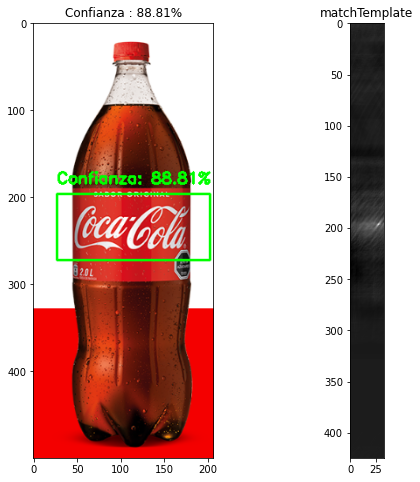

Las dimensiones del template son 400 x 175
Las dimensiones de la imagen son 233 x 363
Las dimensiones del template que mejor ajusta es 229 x 100


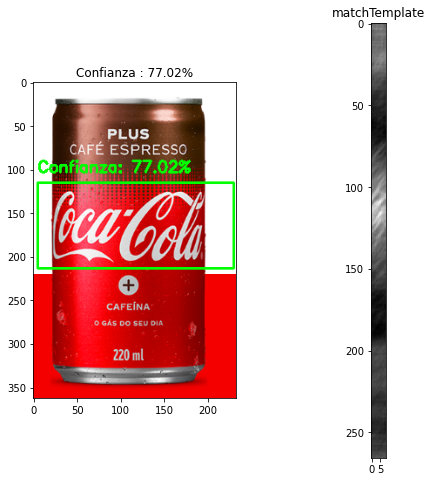

Las dimensiones del template son 400 x 175
Las dimensiones de la imagen son 715 x 493
Las dimensiones del template que mejor ajusta es 699 x 305


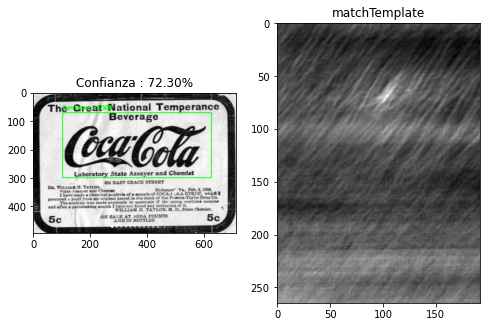

In [21]:
path_imagenes = './images'
imagenes =  ['coca_logo_1.png', 'coca_logo_2.png', 'coca_retro_1.png']

for imagenx in imagenes:
    imagen = './images' + '/' + imagenx
    match_gral(imagen_path=imagen, template_path='./template/pattern.png', 
               umbral=0, niveles=40, metodo=cv.TM_CCOEFF, tam_imagen=(8, 8), multi=False)
    

Las dimensiones del template son 400 x 175
Las dimensiones de la imagen son 715 x 429
Las dimensiones del template que mejor ajusta es 699 x 305


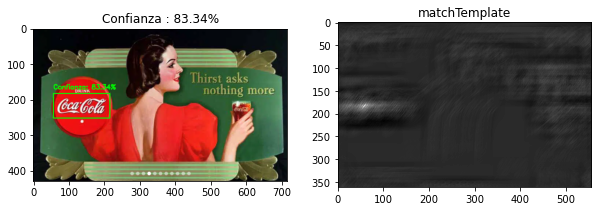

Las dimensiones del template son 400 x 175
Las dimensiones de la imagen son 1389 x 1389
Las dimensiones del template que mejor ajusta es 1356 x 593


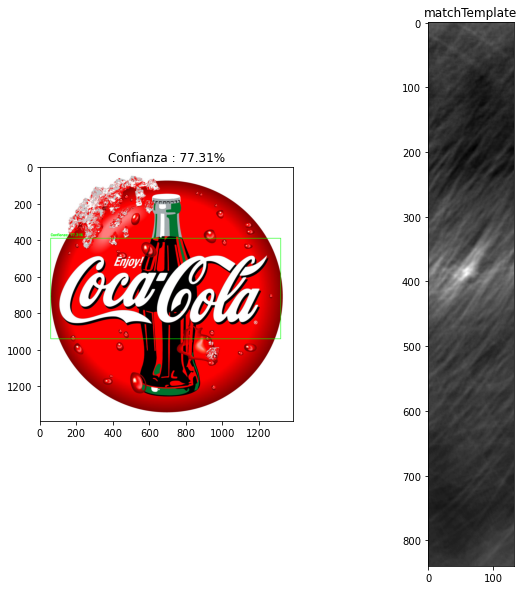

Las dimensiones del template son 400 x 175
Las dimensiones de la imagen son 687 x 450
Las dimensiones del template que mejor ajusta es 671 x 293


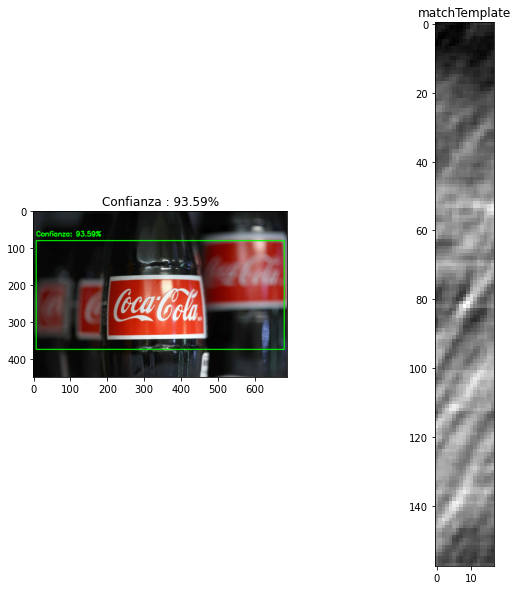

In [22]:
path_imagenes = './images'
imagenes =  ['coca_retro_2.png', 'COCA-COLA-LOGO.jpg', 'logo_1.png']

for imagenx in imagenes:
    imagen = './images' + '/' + imagenx
    match_gral(imagen_path=imagen, template_path='./template/pattern.png', 
               umbral=0, niveles=40, metodo=cv.TM_CCOEFF, tam_imagen=(10, 10), multi=False)

Las dimensiones del template son 400 x 175
Las dimensiones de la imagen son 799 x 598
Las dimensiones del template que mejor ajusta es 781 x 341
Número de resultados ANTES de aplicar non max suppression: 34
Número de resultados DESPUÉS de aplicar non max suppression:: 12


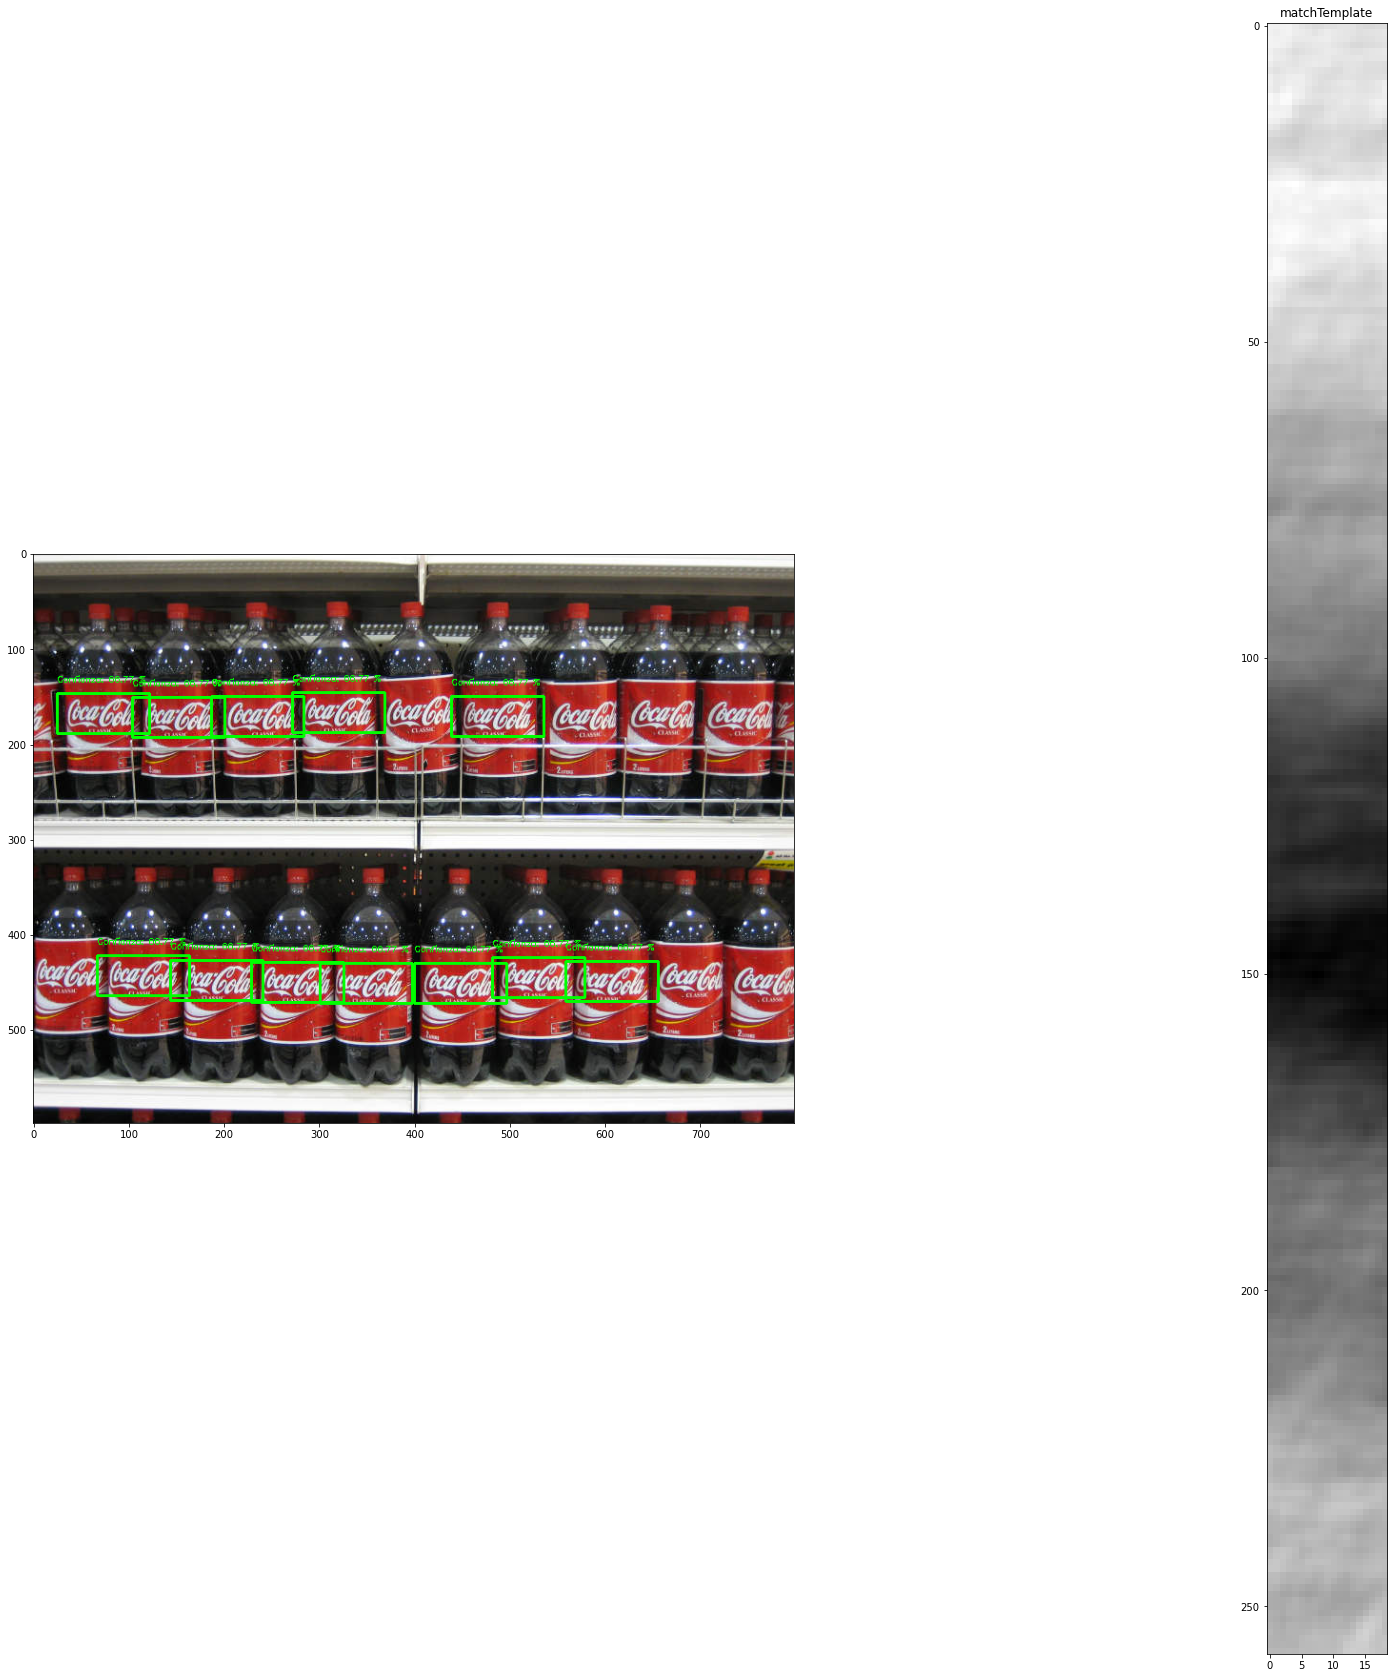

In [23]:
path_imagenes = './images'
imagenes =  ['coca_multi.png']

for imagenx in imagenes:
    imagen = './images' + '/' + imagenx
    match_gral(imagen_path=imagen, template_path='./template/pattern.png', 
               umbral=0.7, niveles=40, metodo=cv.TM_CCOEFF, tam_imagen=(30, 30), multi=True)

#### Resultados y conclusiones punto 3

Para resolver este punto, se definió una función combinando los puntos 1 y 2. \
Los resultados obtenidos con la detección tanto de un logo simple como de múltiples logos en la imagen fueron muy buenos y no se presentaron falsos positivos.
La función permite definir la imagen, el template, el umbral para la detección múltiple, la cantidad de niveles en la pirámide, el método para matchTemplate, el tamaño de la imagen a presentar y si se busca uno o varios templates en la imagen. \
Para el matchTemplate se experimentaron los métodos 'cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR','cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF' y 'cv.TM_SQDIFF_NORMED'. Como en los puntos 1 y 2, los dos métodos que dieron mejores resultados, y muy similares, fueron 'cv.TM_CCOEFF' y 'cv.TM_CCOEFF_NORMED'.
